## <b> <b> GRIP TASK- Prediction using Decision Tree </b> <b>
    
Presented by Anusha Kaligota

## Import Libraries

In [2]:
import pandas as pd
import numpy as np

In [34]:
import matplotlib.pyplot as plt
# import warnings

# warnings.filterwarnings("ignore")

## Read the Data

In [4]:
#url="https://bit.ly/3kXTdox"
iris_data=pd.read_csv("iris.csv")

In [5]:
iris_data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
23,24,5.1,3.3,1.7,0.5,Iris-setosa
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
108,109,6.7,2.5,5.8,1.8,Iris-virginica
19,20,5.1,3.8,1.5,0.3,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

In [6]:
iris_data.shape

(150, 6)

In [7]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris_data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## number of unique values

In [11]:
iris_data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

## droping of zero variance columns

In [12]:
for col in iris_data.columns:
    if iris_data[col].nunique() == iris_data.shape[0] :
        print(col)
        iris_data.drop(col,axis=1,inplace=True)

Id


In [13]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## missing values

In [14]:
iris_data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Target column distribution

In [15]:
iris_data.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [16]:
iris_data.Species.value_counts(normalize=True)*100

Iris-virginica     33.333333
Iris-setosa        33.333333
Iris-versicolor    33.333333
Name: Species, dtype: float64

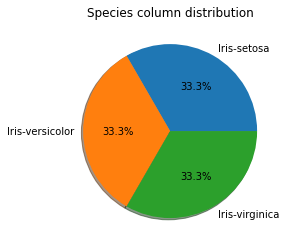

In [17]:
plt.pie(iris_data["Species"].value_counts(),labels=iris_data["Species"].unique(),autopct='%0.1f%%',shadow=True)
plt.title("Species column distribution")
plt.show()

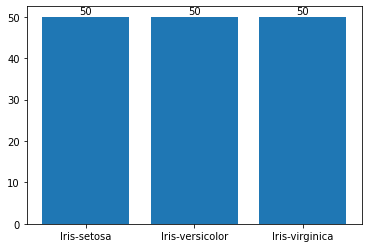

In [18]:
barplot=plt.bar(iris_data["Species"].unique(),iris_data["Species"].value_counts())

# Add the data value to the head of the bar:
for rect in barplot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.002*height,'%d' % 
            height, ha='center', va='bottom')
plt.show()

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
y=iris_data["Species"]
X=iris_data.drop(["Species"],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20,random_state=340, stratify=y)

## Standardization

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
scaler=scaler.fit(X_train)

In [23]:
X_train=scaler.transform(X_train)

In [24]:
X_test=scaler.transform(X_test)

## Model building

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
DT_model = DecisionTreeClassifier(random_state=340)

DT_model.fit(X_train,y_train)

y_pred_train = DT_model.predict(X_train)
y_pred_test = DT_model.predict(X_test)

## Performance  metrics

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
train_accuracy = accuracy_score(y_train,y_pred_train)
train_accuracy

1.0

In [29]:
test_accuracy = accuracy_score(y_test,y_pred_test)
test_accuracy

1.0

In [31]:
y_test==y_pred_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

## Visulaization of Tree

In [32]:
from sklearn import tree

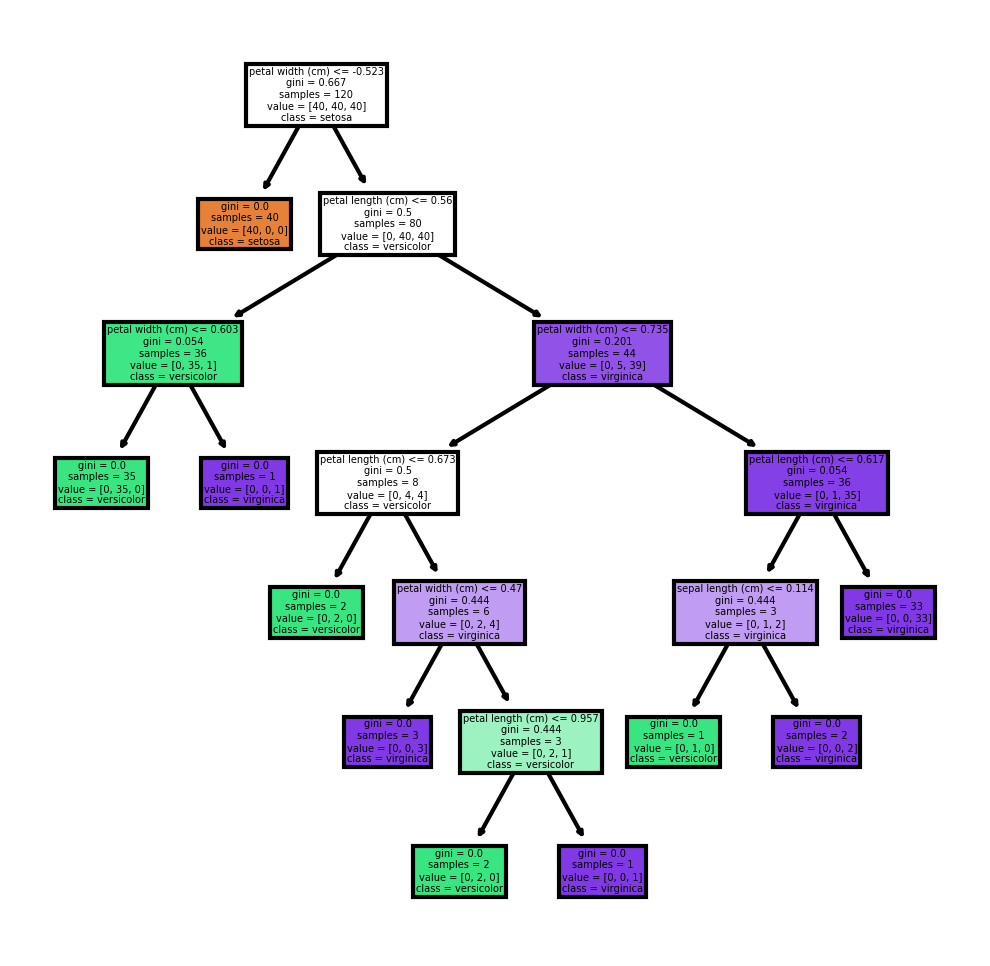

In [33]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(DT_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

                                              Thank you ! 